In [1]:
!pip install xgboost

In [2]:
!pip install catboost

  Stored in directory: C:\Users\emmanuel\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [3]:
#linear algebra
import numpy as np

#Data preprocessing
import pandas as pd

#matlab style plotting
from matplotlib import pyplot as plt
%matplotlib inline

#import seaborn
import seaborn as sns
color =sns.color_palette()
sns.set_style('darkgrid')

#ignore annoying warning from sklearn and seaborn
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [4]:
#read csv files
train_x = pd.read_csv(r'C:\\Users\\emmanuel\\Desktop\\team3\\motgage_data\\train_values.csv', encoding="utf-8")
train_y = pd.read_csv(r'C:\\Users\\emmanuel\\Desktop\\team3\\motgage_data\\train_labels.csv', encoding="utf-8")
test_x =pd.read_csv(r'C:\\Users\\emmanuel\\Desktop\\team3\\motgage_data\\test_values.csv', encoding="utf-8")

#merging features and target data together
join_train = pd.merge(train_x, train_y, on='row_id')
join_train.head().transpose()

In [6]:
#rows and columns of our data
join_train.shape
print("The dataset rows and columns are {}" .format(join_train.shape))

The dataset rows and columns are (500000, 23)


In [7]:
#information our dataset
join_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 no

# EXPLORATORY DATA ANALYSIS

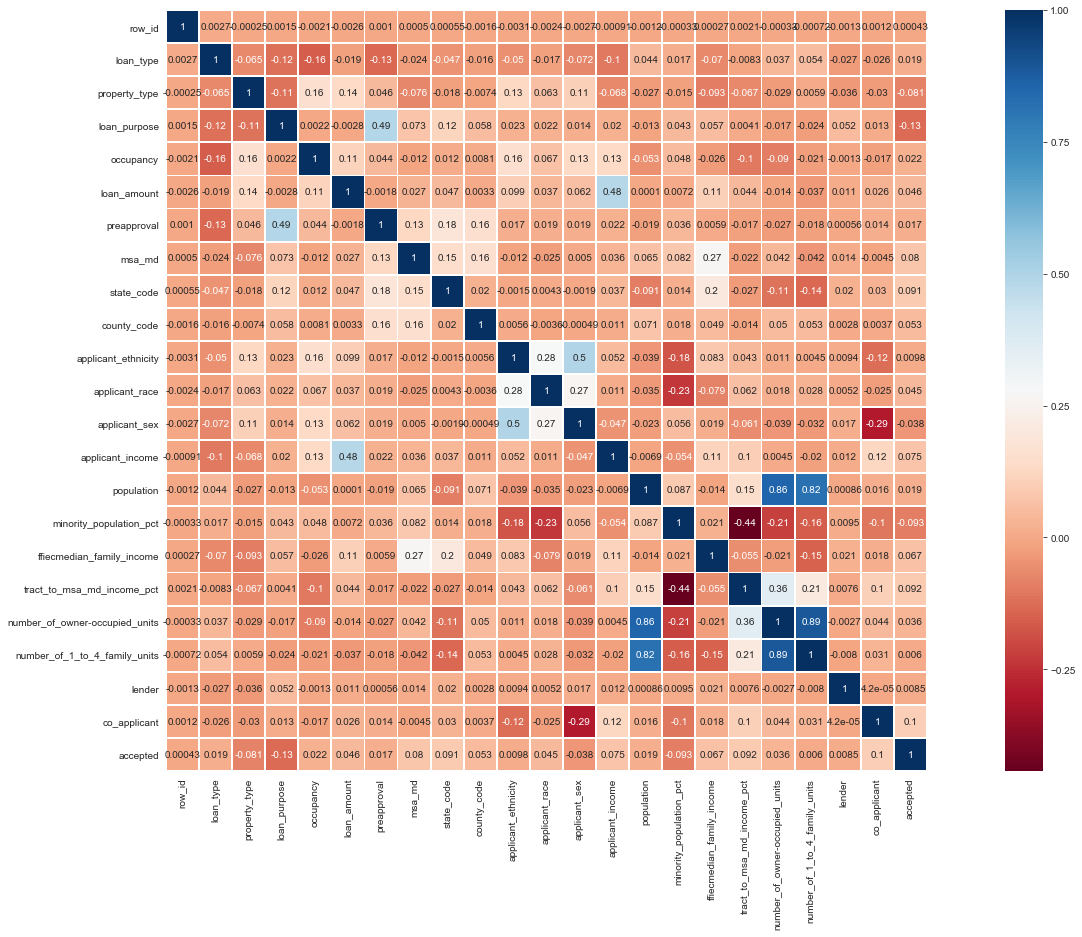

In [8]:
#correlelogram- plot heatmap to find correlation among features
corrmat =join_train.corr()
f, ax = plt.subplots(figsize=(28,14))
sns.heatmap(corrmat, square=True, annot=True, linewidth=0.8, cmap='RdBu')

Text(0, 0.5, 'Loan Accepted')

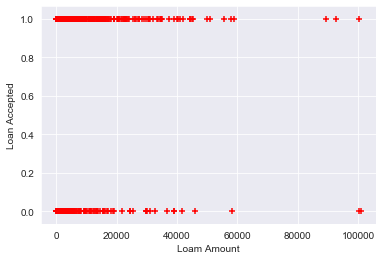

In [9]:
plt.scatter(join_train.loan_amount, join_train.accepted, marker='+', color ='red')
plt.xlabel("Loam Amount")
plt.ylabel("Loan Accepted")

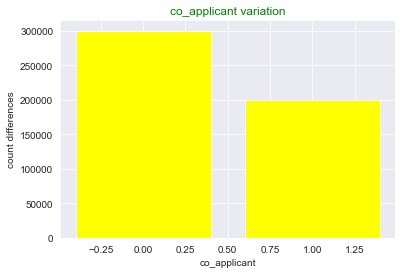

In [10]:
age_cat = join_train.groupby('co_applicant').count()

plt.bar(age_cat.index.values, age_cat['loan_amount'],color='yellow')
plt.xlabel('co_applicant')
plt.ylabel("count differences")
plt.title('co_applicant variation', color ='green')
plt.show()

In [11]:
join_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
row_id,500000.0,249999.500000,144337.711634,0.000,124999.75000,249999.500,374999.25,499999.0
loan_type,500000.0,1.366276,0.690555,1.000,1.00000,1.000,2.00,4.0
property_type,500000.0,1.047650,0.231404,1.000,1.00000,1.000,1.00,3.0
loan_purpose,500000.0,2.066810,0.948371,1.000,1.00000,2.000,3.00,3.0
occupancy,500000.0,1.109590,0.326092,1.000,1.00000,1.000,1.00,3.0
loan_amount,500000.0,221.753158,590.641648,1.000,93.00000,162.000,266.00,100878.0
preapproval,500000.0,2.764722,0.543061,1.000,3.00000,3.000,3.00,3.0
msa_md,500000.0,181.606972,138.464169,-1.000,25.00000,192.000,314.00,408.0
state_code,500000.0,23.726924,15.982768,-1.000,6.00000,26.000,37.00,52.0
county_code,500000.0,144.542062,100.243612,-1.000,57.00000,131.000,246.00,324.0


In [12]:
#lets check for missing value on train dataset
join_train.apply(lambda x: sum(x.isnull()), axis =0)

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

In [13]:
#filling missing data
join_train.fillna(-999,inplace=True)

In [14]:
#lets recheck if missing data has been treated
join_train.apply(lambda x: sum(x.isnull()), axis =0)

row_id                            0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
accepted                          0
dtype: int64

In [15]:
#One hot encode the categorical varaiables on train examples or use catboost from here
encode_co_applicant = pd.get_dummies(join_train.co_applicant)
encode_co_applicant.head()

,False,True
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [16]:
#merging encoded table to our data
train = pd.concat([join_train, encode_co_applicant], axis ="columns")
train.head().transpose()

,0,1,2,3,4
row_id,0,1,2,3,4
loan_type,3,1,2,1,1
property_type,1,1,1,1,1
loan_purpose,1,3,3,1,1
occupancy,1,1,1,1,1
loan_amount,70,178,163,155,305
preapproval,3,3,3,1,3
msa_md,18,369,16,305,24
state_code,37,52,10,47,37
county_code,246,299,306,180,20


In [17]:
train_xy = train.drop(['row_id','co_applicant'],axis=1)

In [18]:
train_xy.head().transpose()

,0,1,2,3,4
loan_type,3.000,1.000,2.00,1.000,1.0
property_type,1.000,1.000,1.00,1.000,1.0
loan_purpose,1.000,3.000,3.00,1.000,1.0
occupancy,1.000,1.000,1.00,1.000,1.0
loan_amount,70.000,178.000,163.00,155.000,305.0
preapproval,3.000,3.000,3.00,1.000,3.0
msa_md,18.000,369.000,16.00,305.000,24.0
state_code,37.000,52.000,10.00,47.000,37.0
county_code,246.000,299.000,306.00,180.000,20.0
applicant_ethnicity,2.000,1.000,2.00,2.000,2.0


In [19]:
x = train_xy.drop('accepted',axis=1)
x.head().transpose()

,0,1,2,3,4
loan_type,3.000,1.000,2.00,1.000,1.0
property_type,1.000,1.000,1.00,1.000,1.0
loan_purpose,1.000,3.000,3.00,1.000,1.0
occupancy,1.000,1.000,1.00,1.000,1.0
loan_amount,70.000,178.000,163.00,155.000,305.0
preapproval,3.000,3.000,3.00,1.000,3.0
msa_md,18.000,369.000,16.00,305.000,24.0
state_code,37.000,52.000,10.00,47.000,37.0
county_code,246.000,299.000,306.00,180.000,20.0
applicant_ethnicity,2.000,1.000,2.00,2.000,2.0


In [20]:
y =join_train.accepted

In [21]:
#train_test_split libraries
from sklearn.model_selection import train_test_split

In [22]:
#logistic regression algorithm
from sklearn.linear_model import LogisticRegression

In [23]:
train =0.70
validate =0.15
test =0.15

In [24]:
xtrain, xtest,ytrain,ytest= train_test_split(x,y, test_size=1-train)
xval,xtest,yval,ytest=train_test_split(xtest,ytest,test_size= test/(test+validate))

In [25]:
#training the model using logistic regression
logmodel =LogisticRegression()

In [26]:
#splitting data into train
logmodel.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
from sklearn.metrics import classification_report
print(classification_report(ytest, logmodel.predict(xtest)))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62     37437
           1       0.62      0.64      0.63     37564

    accuracy                           0.63     75001
   macro avg       0.63      0.63      0.63     75001
weighted avg       0.63      0.63      0.63     75001



In [29]:
score = logmodel.score(xtest, ytest)
print(score)

0.6277649631338249


In [30]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
model = XGBClassifier(iterations=1500, depth=8, learning_rate=0.01,eval_metric='Accuracy',use_best_model=True, random_seed=42)
classifier.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [48]:
classifier.score(xtest,ytest)

0.6918574419007747

In [35]:
from catboost import Pool, CatBoostClassifier, cv

In [37]:
cate_features_index=np.where(x.dtypes != float) [0]; cate_features_index

array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 19, 20, 21],
      dtype=int64)

In [38]:
model =CatBoostClassifier(iterations =1500, depth=8, learning_rate=0.01, eval_metric ='Accuracy', use_best_model=True, random_seed=42)
model.fit(xtrain,ytrain,cate_features_index,eval_set=(xtest,ytest))

0:	learn: 0.6935191	test: 0.6986174	best: 0.6986174 (0)	total: 2.38s	remaining: 59m 35s
1:	learn: 0.6958763	test: 0.7015373	best: 0.7015373 (1)	total: 4.54s	remaining: 56m 40s
2:	learn: 0.6977991	test: 0.7034973	best: 0.7034973 (2)	total: 6.64s	remaining: 55m 13s
3:	learn: 0.6981391	test: 0.7037773	best: 0.7037773 (3)	total: 8.34s	remaining: 51m 59s
4:	learn: 0.6967791	test: 0.7020973	best: 0.7037773 (3)	total: 10.2s	remaining: 50m 47s
5:	learn: 0.7002849	test: 0.7049773	best: 0.7049773 (5)	total: 11.8s	remaining: 49m 7s
6:	learn: 0.7008449	test: 0.7054173	best: 0.7054173 (6)	total: 13.7s	remaining: 48m 37s
7:	learn: 0.7008077	test: 0.7052173	best: 0.7054173 (6)	total: 15.7s	remaining: 48m 54s
8:	learn: 0.7010991	test: 0.7053639	best: 0.7054173 (6)	total: 17.8s	remaining: 49m 8s
9:	learn: 0.7010763	test: 0.7054706	best: 0.7054706 (9)	total: 19.5s	remaining: 48m 27s
10:	learn: 0.7011534	test: 0.7057373	best: 0.7057373 (10)	total: 21.2s	remaining: 47m 50s
11:	learn: 0.7013677	test: 0.705

91:	learn: 0.7065820	test: 0.7110972	best: 0.7111505 (90)	total: 2m 58s	remaining: 45m 31s
92:	learn: 0.7066220	test: 0.7112305	best: 0.7112305 (92)	total: 3m	remaining: 45m 32s
93:	learn: 0.7066449	test: 0.7112838	best: 0.7112838 (93)	total: 3m 2s	remaining: 45m 34s
94:	learn: 0.7067677	test: 0.7113238	best: 0.7113238 (94)	total: 3m 4s	remaining: 45m 35s
95:	learn: 0.7067649	test: 0.7112838	best: 0.7113238 (94)	total: 3m 7s	remaining: 45m 35s
96:	learn: 0.7067934	test: 0.7112972	best: 0.7113238 (94)	total: 3m 8s	remaining: 45m 32s
97:	learn: 0.7068506	test: 0.7114038	best: 0.7114038 (97)	total: 3m 11s	remaining: 45m 39s
98:	learn: 0.7069734	test: 0.7113105	best: 0.7114038 (97)	total: 3m 13s	remaining: 45m 39s
99:	learn: 0.7070963	test: 0.7116838	best: 0.7116838 (99)	total: 3m 15s	remaining: 45m 40s
100:	learn: 0.7070963	test: 0.7119105	best: 0.7119105 (100)	total: 3m 17s	remaining: 45m 41s
101:	learn: 0.7072106	test: 0.7117638	best: 0.7119105 (100)	total: 3m 20s	remaining: 45m 43s
102

180:	learn: 0.7109935	test: 0.7147505	best: 0.7147905 (176)	total: 6m 3s	remaining: 44m 12s
181:	learn: 0.7110363	test: 0.7148571	best: 0.7148571 (181)	total: 6m 6s	remaining: 44m 13s
182:	learn: 0.7110735	test: 0.7147771	best: 0.7148571 (181)	total: 6m 9s	remaining: 44m 15s
183:	learn: 0.7110820	test: 0.7148438	best: 0.7148571 (181)	total: 6m 11s	remaining: 44m 15s
184:	learn: 0.7111335	test: 0.7148838	best: 0.7148838 (184)	total: 6m 13s	remaining: 44m 13s
185:	learn: 0.7111049	test: 0.7149371	best: 0.7149371 (185)	total: 6m 15s	remaining: 44m 13s
186:	learn: 0.7110935	test: 0.7148438	best: 0.7149371 (185)	total: 6m 18s	remaining: 44m 17s
187:	learn: 0.7110792	test: 0.7149905	best: 0.7149905 (187)	total: 6m 20s	remaining: 44m 17s
188:	learn: 0.7110877	test: 0.7149505	best: 0.7149905 (187)	total: 6m 23s	remaining: 44m 19s
189:	learn: 0.7112077	test: 0.7149905	best: 0.7149905 (187)	total: 6m 25s	remaining: 44m 19s
190:	learn: 0.7111620	test: 0.7150171	best: 0.7150171 (190)	total: 6m 27s

269:	learn: 0.7148135	test: 0.7180038	best: 0.7180438 (267)	total: 9m 25s	remaining: 42m 55s
270:	learn: 0.7148220	test: 0.7180438	best: 0.7180438 (267)	total: 9m 27s	remaining: 42m 53s
271:	learn: 0.7148963	test: 0.7181238	best: 0.7181238 (271)	total: 9m 29s	remaining: 42m 50s
272:	learn: 0.7149535	test: 0.7181504	best: 0.7181504 (272)	total: 9m 31s	remaining: 42m 48s
273:	learn: 0.7149678	test: 0.7181371	best: 0.7181504 (272)	total: 9m 33s	remaining: 42m 46s
274:	learn: 0.7150020	test: 0.7180571	best: 0.7181504 (272)	total: 9m 36s	remaining: 42m 45s
275:	learn: 0.7151020	test: 0.7179371	best: 0.7181504 (272)	total: 9m 38s	remaining: 42m 44s
276:	learn: 0.7151849	test: 0.7179638	best: 0.7181504 (272)	total: 9m 40s	remaining: 42m 41s
277:	learn: 0.7152049	test: 0.7181638	best: 0.7181638 (277)	total: 9m 42s	remaining: 42m 40s
278:	learn: 0.7152420	test: 0.7180838	best: 0.7181638 (277)	total: 9m 44s	remaining: 42m 38s
279:	learn: 0.7152163	test: 0.7180971	best: 0.7181638 (277)	total: 9m 

357:	learn: 0.7172163	test: 0.7202037	best: 0.7202037 (357)	total: 12m 44s	remaining: 40m 39s
358:	learn: 0.7172535	test: 0.7200837	best: 0.7202037 (357)	total: 12m 47s	remaining: 40m 39s
359:	learn: 0.7172992	test: 0.7201237	best: 0.7202037 (357)	total: 12m 49s	remaining: 40m 37s
360:	learn: 0.7173563	test: 0.7201771	best: 0.7202037 (357)	total: 12m 51s	remaining: 40m 34s
361:	learn: 0.7173563	test: 0.7201371	best: 0.7202037 (357)	total: 12m 53s	remaining: 40m 33s
362:	learn: 0.7173849	test: 0.7202171	best: 0.7202171 (362)	total: 12m 56s	remaining: 40m 30s
363:	learn: 0.7174535	test: 0.7202571	best: 0.7202571 (363)	total: 12m 58s	remaining: 40m 28s
364:	learn: 0.7174849	test: 0.7203504	best: 0.7203504 (364)	total: 13m	remaining: 40m 26s
365:	learn: 0.7174992	test: 0.7203771	best: 0.7203771 (365)	total: 13m 2s	remaining: 40m 25s
366:	learn: 0.7175335	test: 0.7203504	best: 0.7203771 (365)	total: 13m 5s	remaining: 40m 25s
367:	learn: 0.7175249	test: 0.7203237	best: 0.7203771 (365)	total:

445:	learn: 0.7190649	test: 0.7223237	best: 0.7223237 (445)	total: 16m 1s	remaining: 37m 51s
446:	learn: 0.7190792	test: 0.7222704	best: 0.7223237 (445)	total: 16m 3s	remaining: 37m 49s
447:	learn: 0.7190792	test: 0.7223237	best: 0.7223237 (445)	total: 16m 5s	remaining: 37m 47s
448:	learn: 0.7190792	test: 0.7223637	best: 0.7223637 (448)	total: 16m 7s	remaining: 37m 45s
449:	learn: 0.7190935	test: 0.7223237	best: 0.7223637 (448)	total: 16m 10s	remaining: 37m 44s
450:	learn: 0.7191049	test: 0.7222970	best: 0.7223637 (448)	total: 16m 12s	remaining: 37m 42s
451:	learn: 0.7191306	test: 0.7222837	best: 0.7223637 (448)	total: 16m 15s	remaining: 37m 40s
452:	learn: 0.7191735	test: 0.7222704	best: 0.7223637 (448)	total: 16m 17s	remaining: 37m 38s
453:	learn: 0.7191935	test: 0.7223370	best: 0.7223637 (448)	total: 16m 19s	remaining: 37m 37s
454:	learn: 0.7192192	test: 0.7222437	best: 0.7223637 (448)	total: 16m 22s	remaining: 37m 35s
455:	learn: 0.7192649	test: 0.7222304	best: 0.7223637 (448)	tota

533:	learn: 0.7205678	test: 0.7233104	best: 0.7234170 (531)	total: 19m 19s	remaining: 34m 57s
534:	learn: 0.7205992	test: 0.7234304	best: 0.7234304 (534)	total: 19m 21s	remaining: 34m 55s
535:	learn: 0.7205992	test: 0.7233504	best: 0.7234304 (534)	total: 19m 23s	remaining: 34m 53s
536:	learn: 0.7205963	test: 0.7233370	best: 0.7234304 (534)	total: 19m 26s	remaining: 34m 51s
537:	learn: 0.7206449	test: 0.7233504	best: 0.7234304 (534)	total: 19m 28s	remaining: 34m 49s
538:	learn: 0.7206563	test: 0.7233237	best: 0.7234304 (534)	total: 19m 30s	remaining: 34m 47s
539:	learn: 0.7206506	test: 0.7232437	best: 0.7234304 (534)	total: 19m 32s	remaining: 34m 45s
540:	learn: 0.7206535	test: 0.7233370	best: 0.7234304 (534)	total: 19m 35s	remaining: 34m 42s
541:	learn: 0.7207021	test: 0.7232304	best: 0.7234304 (534)	total: 19m 37s	remaining: 34m 40s
542:	learn: 0.7206878	test: 0.7232304	best: 0.7234304 (534)	total: 19m 39s	remaining: 34m 38s
543:	learn: 0.7207421	test: 0.7232304	best: 0.7234304 (534)	

621:	learn: 0.7219106	test: 0.7240303	best: 0.7240837 (611)	total: 22m 36s	remaining: 31m 54s
622:	learn: 0.7219021	test: 0.7240303	best: 0.7240837 (611)	total: 22m 38s	remaining: 31m 52s
623:	learn: 0.7219363	test: 0.7240570	best: 0.7240837 (611)	total: 22m 41s	remaining: 31m 51s
624:	learn: 0.7218849	test: 0.7240437	best: 0.7240837 (611)	total: 22m 43s	remaining: 31m 49s
625:	learn: 0.7218821	test: 0.7240303	best: 0.7240837 (611)	total: 22m 45s	remaining: 31m 47s
626:	learn: 0.7218878	test: 0.7240437	best: 0.7240837 (611)	total: 22m 48s	remaining: 31m 45s
627:	learn: 0.7219021	test: 0.7240437	best: 0.7240837 (611)	total: 22m 50s	remaining: 31m 42s
628:	learn: 0.7219421	test: 0.7241770	best: 0.7241770 (628)	total: 22m 52s	remaining: 31m 40s
629:	learn: 0.7219449	test: 0.7242037	best: 0.7242037 (629)	total: 22m 54s	remaining: 31m 38s
630:	learn: 0.7219392	test: 0.7242437	best: 0.7242437 (630)	total: 22m 56s	remaining: 31m 36s
631:	learn: 0.7219706	test: 0.7242703	best: 0.7242703 (631)	

709:	learn: 0.7230764	test: 0.7245503	best: 0.7246703 (702)	total: 25m 54s	remaining: 28m 49s
710:	learn: 0.7230792	test: 0.7245237	best: 0.7246703 (702)	total: 25m 56s	remaining: 28m 47s
711:	learn: 0.7230364	test: 0.7245370	best: 0.7246703 (702)	total: 25m 58s	remaining: 28m 44s
712:	learn: 0.7230764	test: 0.7245370	best: 0.7246703 (702)	total: 26m	remaining: 28m 42s
713:	learn: 0.7230449	test: 0.7245503	best: 0.7246703 (702)	total: 26m 3s	remaining: 28m 40s
714:	learn: 0.7230278	test: 0.7246303	best: 0.7246703 (702)	total: 26m 5s	remaining: 28m 39s
715:	learn: 0.7230564	test: 0.7245637	best: 0.7246703 (702)	total: 26m 8s	remaining: 28m 37s
716:	learn: 0.7230564	test: 0.7245637	best: 0.7246703 (702)	total: 26m 10s	remaining: 28m 35s
717:	learn: 0.7230764	test: 0.7245370	best: 0.7246703 (702)	total: 26m 13s	remaining: 28m 33s
718:	learn: 0.7230335	test: 0.7244970	best: 0.7246703 (702)	total: 26m 15s	remaining: 28m 31s
719:	learn: 0.7230621	test: 0.7245637	best: 0.7246703 (702)	total: 

797:	learn: 0.7238764	test: 0.7248570	best: 0.7248570 (790)	total: 29m 9s	remaining: 25m 39s
798:	learn: 0.7239135	test: 0.7247903	best: 0.7248570 (790)	total: 29m 12s	remaining: 25m 37s
799:	learn: 0.7239421	test: 0.7247770	best: 0.7248570 (790)	total: 29m 14s	remaining: 25m 35s
800:	learn: 0.7239335	test: 0.7247237	best: 0.7248570 (790)	total: 29m 16s	remaining: 25m 32s
801:	learn: 0.7239364	test: 0.7247237	best: 0.7248570 (790)	total: 29m 18s	remaining: 25m 30s
802:	learn: 0.7239506	test: 0.7247370	best: 0.7248570 (790)	total: 29m 21s	remaining: 25m 28s
803:	learn: 0.7239478	test: 0.7247237	best: 0.7248570 (790)	total: 29m 23s	remaining: 25m 26s
804:	learn: 0.7239506	test: 0.7247237	best: 0.7248570 (790)	total: 29m 25s	remaining: 25m 24s
805:	learn: 0.7239735	test: 0.7247237	best: 0.7248570 (790)	total: 29m 27s	remaining: 25m 22s
806:	learn: 0.7239992	test: 0.7247370	best: 0.7248570 (790)	total: 29m 30s	remaining: 25m 20s
807:	learn: 0.7239992	test: 0.7248170	best: 0.7248570 (790)	t

885:	learn: 0.7246764	test: 0.7251103	best: 0.7251903 (872)	total: 32m 25s	remaining: 22m 28s
886:	learn: 0.7247078	test: 0.7250703	best: 0.7251903 (872)	total: 32m 28s	remaining: 22m 26s
887:	learn: 0.7247135	test: 0.7250837	best: 0.7251903 (872)	total: 32m 30s	remaining: 22m 24s
888:	learn: 0.7247164	test: 0.7250303	best: 0.7251903 (872)	total: 32m 33s	remaining: 22m 22s
889:	learn: 0.7246764	test: 0.7250170	best: 0.7251903 (872)	total: 32m 35s	remaining: 22m 20s
890:	learn: 0.7247021	test: 0.7249903	best: 0.7251903 (872)	total: 32m 37s	remaining: 22m 17s
891:	learn: 0.7246935	test: 0.7249903	best: 0.7251903 (872)	total: 32m 39s	remaining: 22m 15s
892:	learn: 0.7247278	test: 0.7249903	best: 0.7251903 (872)	total: 32m 41s	remaining: 22m 13s
893:	learn: 0.7247192	test: 0.7251503	best: 0.7251903 (872)	total: 32m 43s	remaining: 22m 10s
894:	learn: 0.7247106	test: 0.7250970	best: 0.7251903 (872)	total: 32m 45s	remaining: 22m 8s
895:	learn: 0.7247306	test: 0.7251103	best: 0.7251903 (872)	t

973:	learn: 0.7255964	test: 0.7256170	best: 0.7256437 (971)	total: 35m 51s	remaining: 19m 21s
974:	learn: 0.7255706	test: 0.7256437	best: 0.7256437 (971)	total: 35m 53s	remaining: 19m 19s
975:	learn: 0.7255906	test: 0.7256570	best: 0.7256570 (975)	total: 35m 55s	remaining: 19m 17s
976:	learn: 0.7256021	test: 0.7256170	best: 0.7256570 (975)	total: 35m 57s	remaining: 19m 14s
977:	learn: 0.7256535	test: 0.7256170	best: 0.7256570 (975)	total: 35m 59s	remaining: 19m 12s
978:	learn: 0.7256478	test: 0.7255370	best: 0.7256570 (975)	total: 36m 1s	remaining: 19m 10s
979:	learn: 0.7256621	test: 0.7255503	best: 0.7256570 (975)	total: 36m 3s	remaining: 19m 8s
980:	learn: 0.7256935	test: 0.7255903	best: 0.7256570 (975)	total: 36m 5s	remaining: 19m 5s
981:	learn: 0.7256935	test: 0.7255770	best: 0.7256570 (975)	total: 36m 8s	remaining: 19m 3s
982:	learn: 0.7256964	test: 0.7255903	best: 0.7256570 (975)	total: 36m 10s	remaining: 19m 1s
983:	learn: 0.7256821	test: 0.7256037	best: 0.7256570 (975)	total: 3

1060:	learn: 0.7263364	test: 0.7262170	best: 0.7262170 (1059)	total: 39m 7s	remaining: 16m 11s
1061:	learn: 0.7263564	test: 0.7262037	best: 0.7262170 (1059)	total: 39m 10s	remaining: 16m 9s
1062:	learn: 0.7263449	test: 0.7262170	best: 0.7262170 (1059)	total: 39m 12s	remaining: 16m 7s
1063:	learn: 0.7263706	test: 0.7262037	best: 0.7262170 (1059)	total: 39m 15s	remaining: 16m 5s
1064:	learn: 0.7263506	test: 0.7262037	best: 0.7262170 (1059)	total: 39m 17s	remaining: 16m 2s
1065:	learn: 0.7263706	test: 0.7262037	best: 0.7262170 (1059)	total: 39m 19s	remaining: 16m
1066:	learn: 0.7264078	test: 0.7261237	best: 0.7262170 (1059)	total: 39m 22s	remaining: 15m 58s
1067:	learn: 0.7264249	test: 0.7261770	best: 0.7262170 (1059)	total: 39m 24s	remaining: 15m 56s
1068:	learn: 0.7264249	test: 0.7261503	best: 0.7262170 (1059)	total: 39m 26s	remaining: 15m 54s
1069:	learn: 0.7264592	test: 0.7262170	best: 0.7262170 (1059)	total: 39m 28s	remaining: 15m 51s
1070:	learn: 0.7264764	test: 0.7261903	best: 0.72

1146:	learn: 0.7268878	test: 0.7267103	best: 0.7267103 (1143)	total: 42m 21s	remaining: 13m 2s
1147:	learn: 0.7268735	test: 0.7266570	best: 0.7267103 (1143)	total: 42m 24s	remaining: 13m
1148:	learn: 0.7268735	test: 0.7266303	best: 0.7267103 (1143)	total: 42m 26s	remaining: 12m 57s
1149:	learn: 0.7268849	test: 0.7266303	best: 0.7267103 (1143)	total: 42m 28s	remaining: 12m 55s
1150:	learn: 0.7269078	test: 0.7266303	best: 0.7267103 (1143)	total: 42m 31s	remaining: 12m 53s
1151:	learn: 0.7269421	test: 0.7266703	best: 0.7267103 (1143)	total: 42m 33s	remaining: 12m 51s
1152:	learn: 0.7269135	test: 0.7267236	best: 0.7267236 (1152)	total: 42m 35s	remaining: 12m 49s
1153:	learn: 0.7269164	test: 0.7266703	best: 0.7267236 (1152)	total: 42m 37s	remaining: 12m 46s
1154:	learn: 0.7269706	test: 0.7267236	best: 0.7267236 (1152)	total: 42m 40s	remaining: 12m 44s
1155:	learn: 0.7269992	test: 0.7267370	best: 0.7267370 (1155)	total: 42m 42s	remaining: 12m 42s
1156:	learn: 0.7269964	test: 0.7267503	best: 

1232:	learn: 0.7276135	test: 0.7268570	best: 0.7269370 (1229)	total: 45m 36s	remaining: 9m 52s
1233:	learn: 0.7276164	test: 0.7268436	best: 0.7269370 (1229)	total: 45m 38s	remaining: 9m 50s
1234:	learn: 0.7276278	test: 0.7268703	best: 0.7269370 (1229)	total: 45m 41s	remaining: 9m 48s
1235:	learn: 0.7276649	test: 0.7268436	best: 0.7269370 (1229)	total: 45m 43s	remaining: 9m 46s
1236:	learn: 0.7276907	test: 0.7267770	best: 0.7269370 (1229)	total: 45m 45s	remaining: 9m 43s
1237:	learn: 0.7277307	test: 0.7268303	best: 0.7269370 (1229)	total: 45m 47s	remaining: 9m 41s
1238:	learn: 0.7277507	test: 0.7269103	best: 0.7269370 (1229)	total: 45m 49s	remaining: 9m 39s
1239:	learn: 0.7277849	test: 0.7268836	best: 0.7269370 (1229)	total: 45m 52s	remaining: 9m 37s
1240:	learn: 0.7277707	test: 0.7268836	best: 0.7269370 (1229)	total: 45m 54s	remaining: 9m 34s
1241:	learn: 0.7277764	test: 0.7268970	best: 0.7269370 (1229)	total: 45m 56s	remaining: 9m 32s
1242:	learn: 0.7277764	test: 0.7268970	best: 0.726

1319:	learn: 0.7285907	test: 0.7274570	best: 0.7274570 (1315)	total: 48m 49s	remaining: 6m 39s
1320:	learn: 0.7285907	test: 0.7274703	best: 0.7274703 (1320)	total: 48m 52s	remaining: 6m 37s
1321:	learn: 0.7285849	test: 0.7274303	best: 0.7274703 (1320)	total: 48m 55s	remaining: 6m 35s
1322:	learn: 0.7286021	test: 0.7275236	best: 0.7275236 (1322)	total: 48m 57s	remaining: 6m 32s
1323:	learn: 0.7285964	test: 0.7275636	best: 0.7275636 (1323)	total: 48m 59s	remaining: 6m 30s
1324:	learn: 0.7286049	test: 0.7275503	best: 0.7275636 (1323)	total: 49m 1s	remaining: 6m 28s
1325:	learn: 0.7286335	test: 0.7275636	best: 0.7275636 (1323)	total: 49m 4s	remaining: 6m 26s
1326:	learn: 0.7286192	test: 0.7275636	best: 0.7275636 (1323)	total: 49m 6s	remaining: 6m 24s
1327:	learn: 0.7286449	test: 0.7275503	best: 0.7275636 (1323)	total: 49m 9s	remaining: 6m 21s
1328:	learn: 0.7286421	test: 0.7275503	best: 0.7275636 (1323)	total: 49m 11s	remaining: 6m 19s
1329:	learn: 0.7286507	test: 0.7275636	best: 0.7275636

1406:	learn: 0.7293421	test: 0.7282570	best: 0.7283636 (1399)	total: 52m 9s	remaining: 3m 26s
1407:	learn: 0.7293278	test: 0.7282436	best: 0.7283636 (1399)	total: 52m 11s	remaining: 3m 24s
1408:	learn: 0.7293421	test: 0.7281903	best: 0.7283636 (1399)	total: 52m 13s	remaining: 3m 22s
1409:	learn: 0.7293621	test: 0.7282570	best: 0.7283636 (1399)	total: 52m 16s	remaining: 3m 20s
1410:	learn: 0.7293678	test: 0.7282303	best: 0.7283636 (1399)	total: 52m 19s	remaining: 3m 18s
1411:	learn: 0.7293992	test: 0.7282303	best: 0.7283636 (1399)	total: 52m 21s	remaining: 3m 15s
1412:	learn: 0.7294164	test: 0.7282836	best: 0.7283636 (1399)	total: 52m 23s	remaining: 3m 13s
1413:	learn: 0.7293992	test: 0.7281903	best: 0.7283636 (1399)	total: 52m 25s	remaining: 3m 11s
1414:	learn: 0.7294249	test: 0.7281503	best: 0.7283636 (1399)	total: 52m 27s	remaining: 3m 9s
1415:	learn: 0.7294478	test: 0.7282436	best: 0.7283636 (1399)	total: 52m 29s	remaining: 3m 6s
1416:	learn: 0.7294335	test: 0.7282570	best: 0.728363

1493:	learn: 0.7300535	test: 0.7286570	best: 0.7287103 (1484)	total: 55m 23s	remaining: 13.3s
1494:	learn: 0.7300478	test: 0.7287370	best: 0.7287370 (1494)	total: 55m 24s	remaining: 11.1s
1495:	learn: 0.7300335	test: 0.7286703	best: 0.7287370 (1494)	total: 55m 27s	remaining: 8.9s
1496:	learn: 0.7300621	test: 0.7286436	best: 0.7287370 (1494)	total: 55m 29s	remaining: 6.67s
1497:	learn: 0.7300707	test: 0.7286170	best: 0.7287370 (1494)	total: 55m 31s	remaining: 4.45s
1498:	learn: 0.7300935	test: 0.7285770	best: 0.7287370 (1494)	total: 55m 33s	remaining: 2.22s
1499:	learn: 0.7300878	test: 0.7285903	best: 0.7287370 (1494)	total: 55m 35s	remaining: 0us

bestTest = 0.7287369502
bestIteration = 1494

Shrink model to first 1495 iterations.


In [43]:
#print(classification_report(ytest, model.predict(xtest)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, model.predict(xtest))
print(confusion_matrix)

[[25097 12340]
 [ 8005 29559]]


## The result is telling us that we have 25097+29559 correct predictions and 12340+8005 incorrect predictions.